In [112]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import Image
import numpy as np
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
with MPRester("Jqka7RaOKJvTC6iABC") as me:    
    
    # Structure for material id
    pars = CifParser("mp9368.cif")
    struct = pars.get_structures()[0]
    spg = SpacegroupAnalyzer(struct)
    
    bs = me.get_bandstructure_by_material_id("mp-9368")
    band = Image(filename='band_struct.png')
    
    bsp = BSPlotter(bs)
    data = bsp.bs_plot_data() #données du graphe
    print(bsp)

La structure de bandes électroniques provenant du Materials Project est représentée la figure suivante.


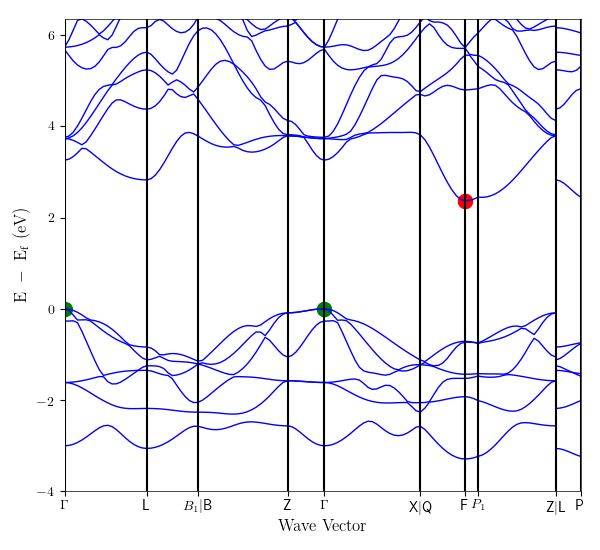

On observe une bande interdite indirecte.
L’énergie de la bande interdite est de 2.3680000000000003 eV. Sur la figure, cela correspond à la distance entre le point vert et le point rouge.
Le vecteur de transition est \Gamma-F .


In [52]:
# Détermination de la bande interdite
gap = bs.get_band_gap()
print("La structure de bandes électroniques provenant du Materials Project est représentée la figure suivante.")
display(band)
if gap['direct'] == True :
    print("On observe une bande interdite directe.")
if gap['direct'] == False :
    print("On observe une bande interdite indirecte.")
print("L’énergie de la bande interdite est de",gap['energy'],"eV. Sur la figure, cela correspond à la distance entre le point vert et le point rouge.")
print("Le vecteur de transition est",gap['transition'],".")

In [231]:
# Minimum et maximum de la dernière bande de valence
minim = 10
maxim = 0
le = len(((data["ticks"]))["distance"])
a = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
m=0
for j in range (0,le):
    a0 = a[m-1]
    d = (data["ticks"])["distance"][j]
    if (d != a0):
        a[m] = d
        m=m+1
    j = j+1
le2 = len(((data["ticks"]))["label"])
a2 = ["","","","","","","","","",""]
n=0
for k in range (0,le2):
    a0 = a2[n-1]
    d2 = (data["ticks"])["label"][k]
    if (d2 != a0):
        a2[n] = d2
        n=n+1
    k = k+1
for i in range (0,8):
    l = len(data.get("energy")[i].get("1")[14])
    y0 = data.get("energy")[i].get("1")[14][0]
    y1 = data.get("energy")[i].get("1")[14][l-1]
    x0 = a[i]
    x1 = a[i+1]
    penteval = (y1-y0)/(x1-x0)
    if abs(penteval) > maxim : 
        maxim = abs(penteval)
        c = i;
    if abs(penteval) < minim :
        minim = abs(penteval)
        e = i;
print("La pente minimale de la dernière bande de valence est de", minim)
print("La pente maximale de la dernière bande de valence est de ", maxim)

La pente minimum de la dernière bande de valence est de 0.03828147321810308
La pente maximale de la dernière bande de valence est de  2.8820581498275337


In [233]:
# Minimum et maximum de la première bande de conduction
minim = 10
maxim = 0
le = len(((data["ticks"]))["distance"])
a = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
m=0
for j in range (0,le):
    a0 = a[m-1]
    d = (data["ticks"])["distance"][j]
    if (d != a0):
        a[m] = d
        m=m+1
    j = j+1
le2 = len(((data["ticks"]))["label"])
a2 = ["","","","","","","","","",""]
n=0
for k in range (0,le2):
    a0 = a2[n-1]
    d2 = (data["ticks"])["label"][k]
    if (d2 != a0):
        a2[n] = d2
        n=n+1
    k = k+1
for i in range (0,8):
    l = len(data.get("energy")[i].get("1")[15])
    y0 = data.get("energy")[i].get("1")[15][0]
    y1 = data.get("energy")[i].get("1")[15][l-1]
    x0 = a[i]
    x1 = a[i+1]
    penteval = (y1-y0)/(x1-x0)
    if abs(penteval) > maxim : 
        maxim = abs(penteval)
        c = i;
    if abs(penteval) < minim :
        minim = abs(penteval)
        e = i;
print("La pente minimale de la première bande de conduction est de", minim)
print("La pente maximale de la première bande de conduction est de", maxim)

La pente minimum de la première bande de conduction est de 0.01049754904395015
La pente maximale de la première bande de conduction est de 10.113136440627798
